##Introduction to Computer Vison with Tensorflow

Computer vison is the practise of writting algorithems which can see the data from camara

##Get the data
link:https://www.kaggle.com/dansbecker/food-101

In here only using pizza and steak (Binary Classification)

In [6]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip the downloaded file
zip_ref=zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2021-07-10 04:56:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.199.128, 74.125.20.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.199.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   169MB/s    in 0.6s    

2021-07-10 04:56:57 (169 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



##Inspect the Data

A vey crutial step at the begining is the become one with the data.At the computer vision this means visual many data.

In [7]:
!ls pizza_steak

test  train


In [8]:
import os

#walk though the dir and list the number
for dirpath,dirnames,filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in ''{dirpath}.")

There are 2 directories and 1 images in ''pizza_steak.
There are 2 directories and 1 images in ''pizza_steak/test.
There are 0 directories and 250 images in ''pizza_steak/test/steak.
There are 0 directories and 250 images in ''pizza_steak/test/pizza.
There are 2 directories and 1 images in ''pizza_steak/train.
There are 0 directories and 750 images in ''pizza_steak/train/steak.
There are 0 directories and 750 images in ''pizza_steak/train/pizza.


In [9]:
#extra file in the dir is ".DS Store"
!ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Jul 10 04:56 .
drwxr-xr-x 1 root root 4096 Jul 10 04:56 ..
-rw-r--r-- 1 root root 6148 Jul 10 04:56 .DS_Store
drwxr-xr-x 4 root root 4096 Jul 10 04:56 test
drwxr-xr-x 4 root root 4096 Jul 10 04:56 train


In [10]:
#another way to find out how many images in the file
num_steak_images_train =len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

##Visualize the Data

In [11]:
#get the class names programatically
import pathlib
import numpy as np
data_dir=pathlib.Path("pizza_steak/train")
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

#remove the ds store
class_names=class_names[1:]
print(class_names)

['pizza' 'steak']


In [12]:
#visulaize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir,target_class):
  #setup the target directory 
  target_folder =target_dir+target_class

  #get the random image path
  random_image =random.sample(os.listdir(target_folder),1)

  #read the image and plot it using matplotlib
  img =mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape : {img.shape}")

  return img
  

Image shape : (384, 512, 3)


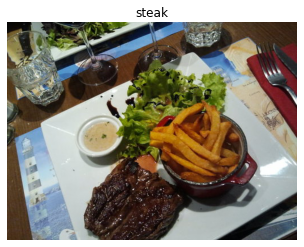

In [13]:
#view random image from training data set
img  =view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak"
)


In [14]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 5,  3,  4],
        [ 6,  4,  5],
        [ 6,  4,  5],
        ...,
        [52, 33, 18],
        [49, 30, 15],
        [46, 27, 12]],

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 6,  4,  5],
        ...,
        [51, 32, 17],
        [50, 31, 16],
        [49, 30, 15]],

       [[ 6,  4,  5],
        [ 6,  4,  5],
        [ 7,  5,  6],
        ...,
        [51, 32, 17],
        [52, 33, 18],
        [52, 33, 18]],

       ...,

       [[68, 44, 20],
        [68, 44, 20],
        [68, 44, 20],
        ...,
        [24, 16, 14],
        [21, 13, 11],
        [18, 10,  8]],

       [[69, 45, 21],
        [68, 44, 20],
        [67, 43, 19],
        ...,
        [22, 12, 11],
        [20, 10,  9],
        [18,  8,  7]],

       [[72, 48, 24],
        [69, 45, 21],
        [67, 43, 19],
        ...,
        [20, 10,  9],
        [20, 10,  9],
        [18,  8,  7]]], dtype=uint8)>

In [15]:
#view the image shape 
img.shape

(384, 512, 3)

In [16]:
#get all the pixel values 0.1
img/255

array([[[0.01960784, 0.01176471, 0.01568627],
        [0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        ...,
        [0.20392157, 0.12941176, 0.07058824],
        [0.19215686, 0.11764706, 0.05882353],
        [0.18039216, 0.10588235, 0.04705882]],

       [[0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        ...,
        [0.2       , 0.1254902 , 0.06666667],
        [0.19607843, 0.12156863, 0.0627451 ],
        [0.19215686, 0.11764706, 0.05882353]],

       [[0.02352941, 0.01568627, 0.01960784],
        [0.02352941, 0.01568627, 0.01960784],
        [0.02745098, 0.01960784, 0.02352941],
        ...,
        [0.2       , 0.1254902 , 0.06666667],
        [0.20392157, 0.12941176, 0.07058824],
        [0.20392157, 0.12941176, 0.07058824]],

       ...,

       [[0.26666667, 0.17254902, 0.07843137],
        [0.26666667, 0.17254902, 0.07843137],
        [0.26666667, 0

##An end to end Example

build the convolutional neural network to find patterns in images ,more specifically way we need

*load our images

*preprocess our images

*build a CNN to find patternsin our image

*compile our CNN

*fit the CNN to training data

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#set the seed
tf.random.set_seed(42)

#preprocess data(get all pixel values between 0 and 1)
train_datagen =ImageDataGenerator(rescale=1./255)
valid_datagen =ImageDataGenerator(rescale=1./255)

#setup paths to directories
train_dir="/content/pizza_steak/train"
test_dir="/content/pizza_steak/test"

#import data from directories anf turn into batches
train_data =train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

valid_data=valid_datagen.flow_from_directory(directory=test_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=42)

#build the CNN model
model_1 =tf.keras.Sequential([
                              tf.keras.layers.Conv2D(filters=10,
                                                     kernel_size=3,
                                                     activation="relu",
                                                     input_shape=(224,224,3)),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(pool_size=2,
                                                        padding="valid"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.Conv2D(10,3,activation="relu"),
                              tf.keras.layers.MaxPool2D(2),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics =["accuracy"])

#fit the model
history_1 =model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 41s 199ms/step - loss: 0.6068 - accuracy: 0.6707 - val_loss: 0.4867 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4534 - accuracy: 0.7967 - val_loss: 0.3503 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4090 - accuracy: 0.8240 - val_loss: 0.3316 - val_accuracy: 0.8660
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3679 - accuracy: 0.8520 - val_loss: 0.3737 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 9s 186ms/step - loss: 0.3253 - accuracy: 0.8633 - val_loss: 0.3058 - val_accuracy: 0.8720


If above is taking longer make sure to change the hardware type to "GPU".

Then restart the envirnment

In [18]:
# Found 1500 images belonging to 2 classes.
# Found 500 images belonging to 2 classes.
# Epoch 1/5
# 47/47 [==============================] - ETA: 0s - loss: 0.5718 - accuracy: 0.6933

In [19]:
#model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

##Use the model as before

relicate the model pre built in classification



In [21]:
#set random seed
tf.random.set_seed(42)

#create a model to replicte playgroud model
model_2 =tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(4,activation="relu"),
                              tf.keras.layers.Dense(1,activation="sigmoid")
])

#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_2=model_2.fit(train_data,
                      epochs=5,
                      steps_per_epoch=len(train_data),
                      validation_data=valid_data,
                      validation_steps=len(valid_data))



Epoch 1/5
47/47 [==============================] - 9s 175ms/step - loss: 1.2124 - accuracy: 0.5080 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 173ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 172ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
